# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors

# **3. Memuat Dataset**

In [2]:
data = pd.read_csv(r"..\data\dataset\transfusion.csv", delimiter=",")
data

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


# **4. Exploratory Data Analysis (EDA)**

##### **1. Memahami Struktur Data**

In [3]:
data

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


array([[<Axes: title={'center': 'Recency (months)'}>,
        <Axes: title={'center': 'Frequency (times)'}>],
       [<Axes: title={'center': 'Monetary (c.c. blood)'}>,
        <Axes: title={'center': 'Time (months)'}>],
       [<Axes: title={'center': 'whether he/she donated blood in March 2007'}>,
        <Axes: >]], dtype=object)

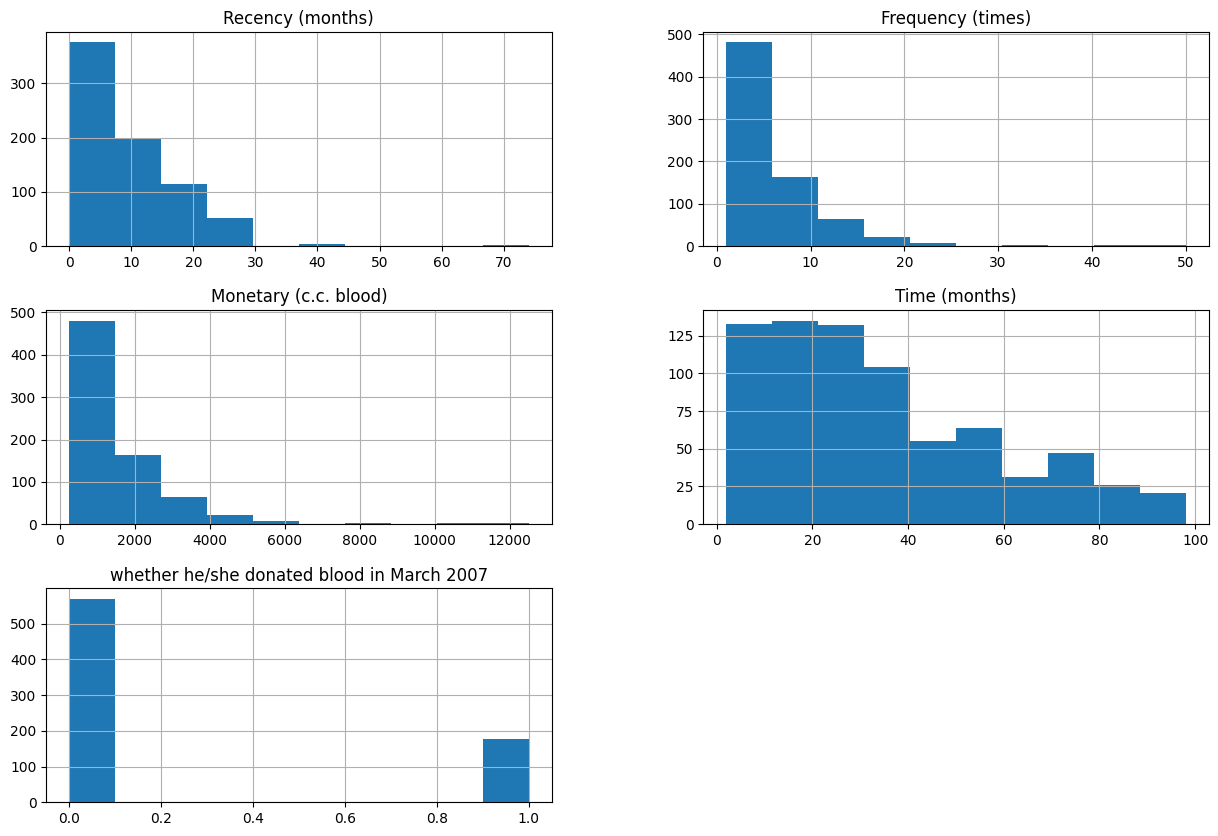

In [6]:
data.hist(figsize=(15, 10))

##### **2. Menangani Data Kosong**

In [7]:
missing_values = data.isna().sum()
missing_percentage = (missing_values / len(data)) * 100
 
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)
display(missing_percentage)
display(missing_data)
if(missing_data['Missing Values'].all() > 0):
    missing_data[missing_data['Missing Values'] > 0]
    print("There is missing values in the dataset")
else:
    print("No missing values in the dataset")

Recency (months)                              0.0
Frequency (times)                             0.0
Monetary (c.c. blood)                         0.0
Time (months)                                 0.0
whether he/she donated blood in March 2007    0.0
dtype: float64

,Missing Values,Percentage
Recency (months),0,0.0
Frequency (times),0,0.0
Monetary (c.c. blood),0,0.0
Time (months),0,0.0
whether he/she donated blood in March 2007,0,0.0


No missing values in the dataset


In [ ]:
data = pd.DataFrame(data)
data = data.rename(columns={"Recency (months)":"Months", "Frequency (times)":"Frequencies", "Monetary (c.c. blood)":"Monetary", 
                            "Time (months)":"NumMonth","whether he/she donated blood in March 2007":"isDonate"})
data

,Months,Frequencies,Monetary,NumMonth,isDonate
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [9]:
data_isdonate = data.groupby(by=["isDonate"]).agg({"isDonate":"count"}).rename(columns={"isDonate": "numDonate"})
display(data_isdonate)


,numDonate
isDonate,
0,570
1,178


##### **4. Visualisasi Data**

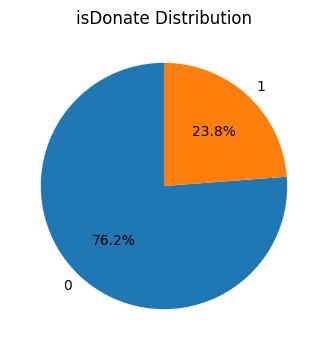

In [10]:
plt.figure(figsize=(4, 4))
plt.pie(data.isDonate.value_counts(), labels=['0','1'], autopct='%1.1f%%', startangle=90)
plt.title('isDonate Distribution')
plt.show()

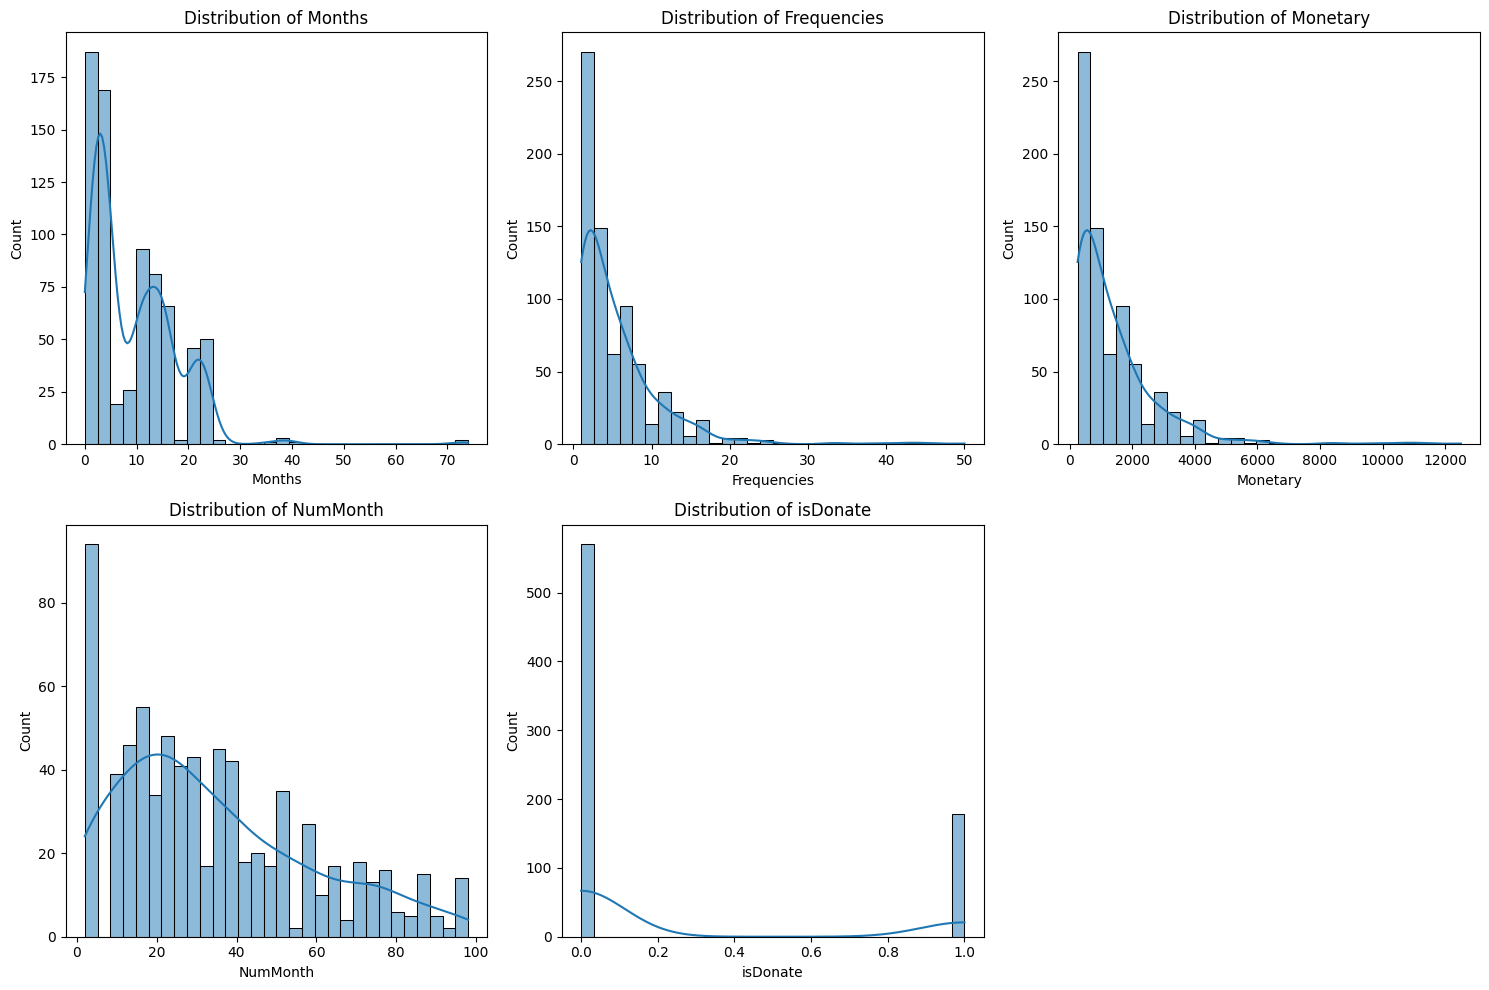

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(data, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [13]:
data_corr = data.corr()
data_corr

,Months,Frequencies,Monetary,NumMonth,isDonate
Months,1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequencies,-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary,-0.182745,1.000000,1.000000,0.634940,0.218633
NumMonth,0.160618,0.634940,0.634940,1.000000,-0.035854
isDonate,-0.279869,0.218633,0.218633,-0.035854,1.000000


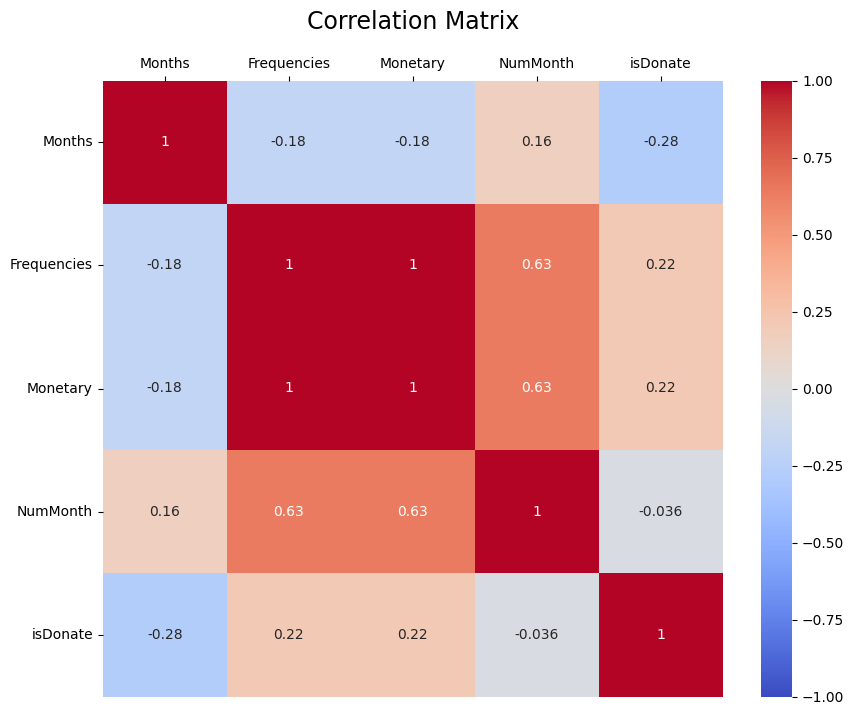

In [ ]:
plt.figure(figsize=(10, 8))
cm = data_corr
 
sns.heatmap(cm, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=17, pad=20)
plt.yticks(rotation=0, horizontalalignment='right')
plt.gca().xaxis.tick_top()
plt.show()

# **5. Data Preprocessing**

##### 1. Deteksi dan Penanganan Outlier 
Namun, ini tidak dipakai untuk tahap analisis pada datasetnya karena data yang kedetect outlier bisa jadi informasi penting, maka kita tidak akan menangani data outlier secara matematis dan mengunjungi ke tahap lebih lanjut untuk sementara.

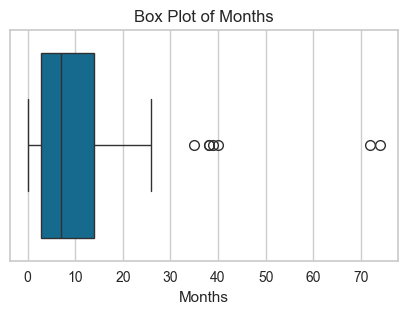

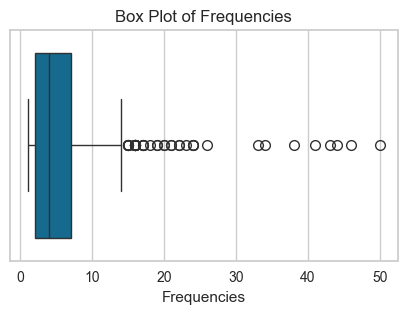

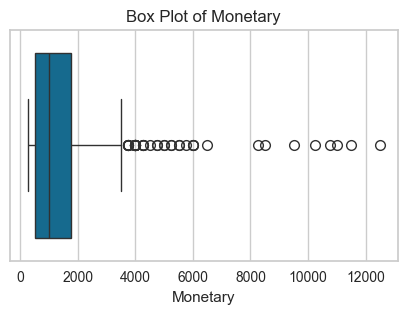

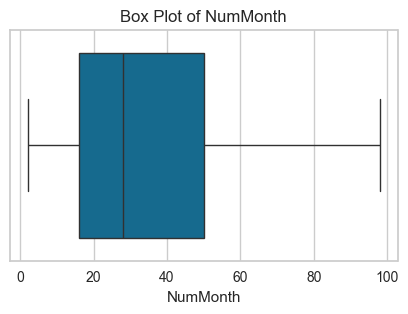

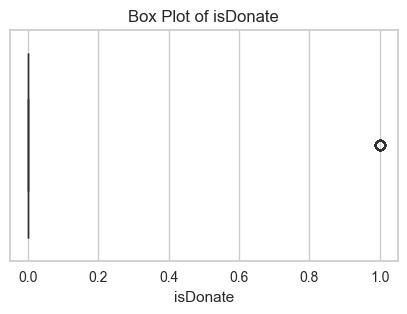

In [15]:
# Mendeteksi Outlier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for feature in data:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [ ]:
# Menghapus outlier
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
batas_bawah, batas_atas = (Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR)

condition = ~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
df_iqr = data.loc[condition, data.columns]

,Months,Frequencies,Monetary,NumMonth,isDonate
0,2.0,50,12500,98,1
1,0.0,13,3250,28,1
2,1.0,16,4000,35,1
3,2.0,20,5000,45,1
4,1.0,24,6000,77,0
...,...,...,...,...,...
743,23.0,2,500,38,0
744,21.0,2,500,52,0
745,23.0,3,750,62,0
746,7.0,1,250,39,0


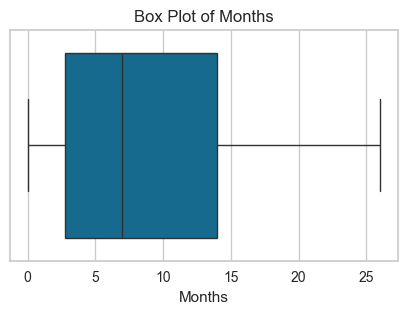

,Months,Frequencies,Monetary,NumMonth,isDonate
0,2.0,4.0,12500,98,1
1,0.0,13.0,3250,28,1
2,1.0,4.0,4000,35,1
3,2.0,4.0,5000,45,1
4,1.0,4.0,6000,77,0
...,...,...,...,...,...
743,23.0,2.0,500,38,0
744,21.0,2.0,500,52,0
745,23.0,3.0,750,62,0
746,7.0,1.0,250,39,0


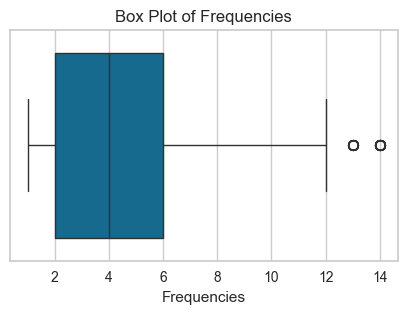

,Months,Frequencies,Monetary,NumMonth,isDonate
0,2.0,4.0,1000.0,98,1
1,0.0,13.0,3250.0,28,1
2,1.0,4.0,1000.0,35,1
3,2.0,4.0,1000.0,45,1
4,1.0,4.0,1000.0,77,0
...,...,...,...,...,...
743,23.0,2.0,500.0,38,0
744,21.0,2.0,500.0,52,0
745,23.0,3.0,750.0,62,0
746,7.0,1.0,250.0,39,0


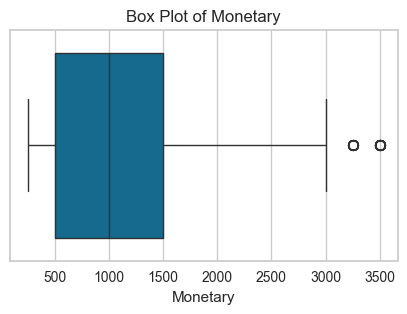

,Months,Frequencies,Monetary,NumMonth,isDonate
0,2.0,4.0,1000.0,98,1
1,0.0,13.0,3250.0,28,1
2,1.0,4.0,1000.0,35,1
3,2.0,4.0,1000.0,45,1
4,1.0,4.0,1000.0,77,0
...,...,...,...,...,...
743,23.0,2.0,500.0,38,0
744,21.0,2.0,500.0,52,0
745,23.0,3.0,750.0,62,0
746,7.0,1.0,250.0,39,0


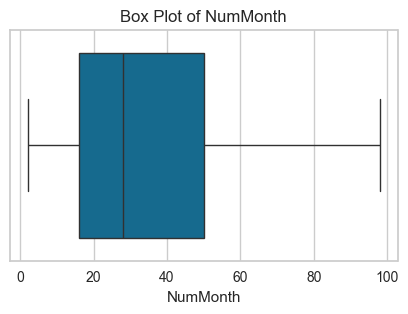

,Months,Frequencies,Monetary,NumMonth,isDonate
0,2.0,4.0,1000.0,98,0.0
1,0.0,13.0,3250.0,28,0.0
2,1.0,4.0,1000.0,35,0.0
3,2.0,4.0,1000.0,45,0.0
4,1.0,4.0,1000.0,77,0.0
...,...,...,...,...,...
743,23.0,2.0,500.0,38,0.0
744,21.0,2.0,500.0,52,0.0
745,23.0,3.0,750.0,62,0.0
746,7.0,1.0,250.0,39,0.0


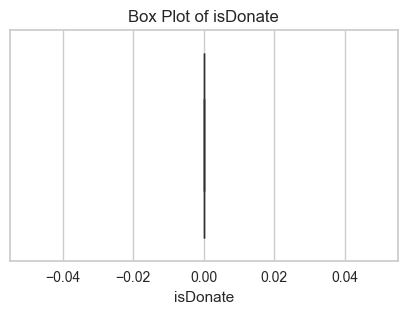

In [16]:
# Menangani Outlier

def median_outlier(data, batas_bawah, batas_atas):
    median = data.median()
    data = data.apply(lambda x: median if (x < batas_bawah) | (x > batas_atas) else x)
    return data

def near_outlier(data, batas_bawah, batas_atas):
    data = data.apply(lambda x: (Q1 - 1.5 * IQR) if x < batas_bawah else batas_atas if x > batas_bawah else x)
    return data

def delete_outlier(data, batas_bawah, batas_atas):
    condition = ~((data < (batas_bawah)) | (data > (batas_atas))).any(axis=1)
    return condition

def handleOutlier(data, feature):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah, batas_atas = (Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR)
    
    # display(data, feature)
    # replace outlier wiith median
    data = median_outlier(data, batas_bawah, batas_atas)

    # replace outlier with near bound
    # data = near_outlier(data, batas_bawah, batas_atas)
    return data

dataCopy = data.copy()
for feature in dataCopy.columns:
    dataCopy[feature] = handleOutlier(dataCopy[feature], feature)
    display(dataCopy)
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=dataCopy[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [17]:
b = ["Frequencies", "Monetary"]
for feature in b:
    dataCopy[feature] = handleOutlier(dataCopy[feature], feature)
    
display(dataCopy)

,Months,Frequencies,Monetary,NumMonth,isDonate
0,2.0,4.0,1000.0,98,0.0
1,0.0,4.0,1000.0,28,0.0
2,1.0,4.0,1000.0,35,0.0
3,2.0,4.0,1000.0,45,0.0
4,1.0,4.0,1000.0,77,0.0
...,...,...,...,...,...
743,23.0,2.0,500.0,38,0.0
744,21.0,2.0,500.0,52,0.0
745,23.0,3.0,750.0,62,0.0
746,7.0,1.0,250.0,39,0.0


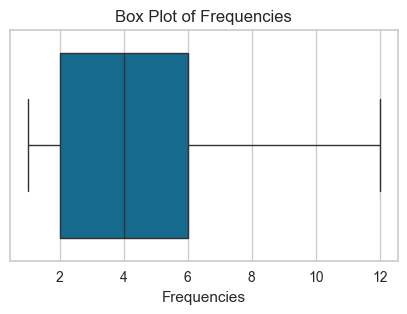

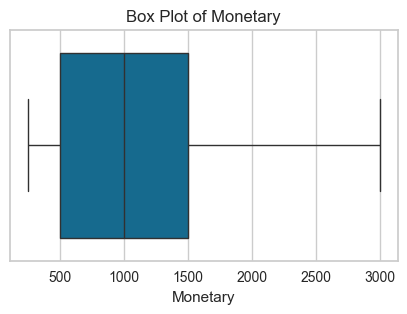

In [18]:
for feature in b:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=dataCopy[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

##### 5. Feature Selecting
Memilih kolom untuk melatih model

In [ ]:
features = ["Months", "Frequencies", "Monetary"]

display(data[features])
display(data.info())

,Months,Frequencies,Monetary
0,2,50,12500
1,0,13,3250
2,1,16,4000
3,2,20,5000
4,1,24,6000
...,...,...,...
743,23,2,500
744,21,2,500
745,23,3,750
746,39,1,250


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Months       748 non-null    int64
 1   Frequencies  748 non-null    int64
 2   Monetary     748 non-null    int64
 3   NumMonth     748 non-null    int64
 4   isDonate     748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


None

##### 5. Normalisasi atau Standarisasi Fitur

In [ ]:
# normalization = MinMaxScaler()
scaler = StandardScaler()
data_scaler = scaler.fit_transform(data[features])
display(data_scaler)

array([[-0.92789873,  7.62334626,  7.62334626],
       [-1.17511806,  1.28273826,  1.28273826],
       [-1.0515084 ,  1.79684161,  1.79684161],
       ...,
       [ 1.66790417, -0.43093957, -0.43093957],
       [ 3.64565877, -0.77367514, -0.77367514],
       [ 7.72477762, -0.77367514, -0.77367514]])

Text(0.5, 1.0, 'Histogram Sebelum Di-transform oleh standarisasi')

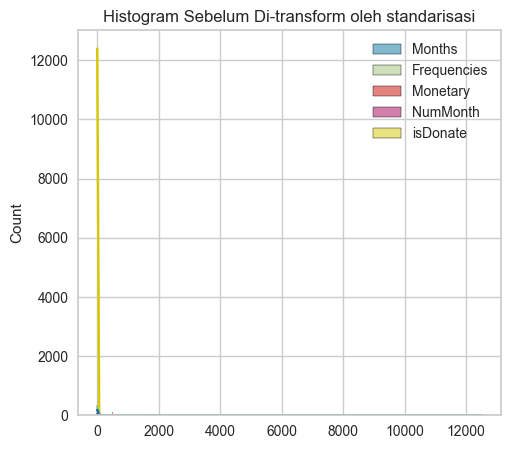

In [18]:
# Histogram Sebelum Normalisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data, kde=True)
plt.title("Histogram Sebelum Di-transform oleh standarisasi")

Text(0.5, 1.0, 'Histogram Setelah Di-transform oleh Standarisasi')

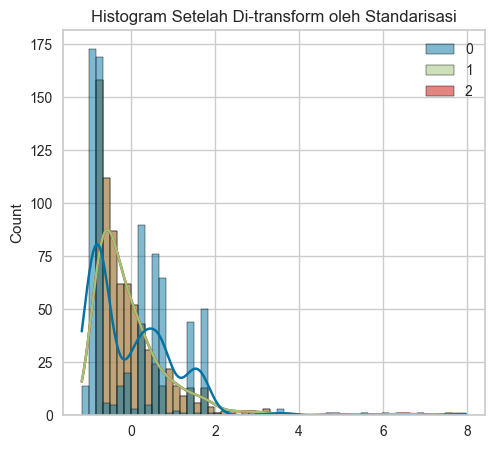

In [19]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.histplot(data_scaler, kde=True)
plt.title("Histogram Setelah Di-transform oleh Standarisasi")

In [19]:
# data_numMonths = data.copy()
data_without_numMonths = data.copy()
# data_without_numMonths = dataCopy.copy()

In [20]:
display(data)
# display(data_numMonths)
display(data_without_numMonths)

,Months,Frequencies,Monetary,NumMonth,isDonate
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


,Months,Frequencies,Monetary,NumMonth,isDonate
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [21]:
features

['Months', 'Frequencies', 'Monetary']

In [22]:
data_without_numMonths[features] = data_scaler
data_without_numMonths

,Months,Frequencies,Monetary,NumMonth,isDonate
0,-0.927899,7.623346,7.623346,98,1
1,-1.175118,1.282738,1.282738,28,1
2,-1.051508,1.796842,1.796842,35,1
3,-0.927899,2.482313,2.482313,45,1
4,-1.051508,3.167784,3.167784,77,0
...,...,...,...,...,...
743,1.667904,-0.602307,-0.602307,38,0
744,1.420685,-0.602307,-0.602307,52,0
745,1.667904,-0.430940,-0.430940,62,0
746,3.645659,-0.773675,-0.773675,39,0


In [24]:
X = data_without_numMonths[features].values
print(X)

[[-0.92789873  7.62334626  7.62334626]
 [-1.17511806  1.28273826  1.28273826]
 [-1.0515084   1.79684161  1.79684161]
 ...
 [ 1.66790417 -0.43093957 -0.43093957]
 [ 3.64565877 -0.77367514 -0.77367514]
 [ 7.72477762 -0.77367514 -0.77367514]]


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering & Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

##### 2. Kode python manual untuk menentukan eps

In [28]:
def plot_k_distance(X, k=4):
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    
    # Ambil jarak ke tetangga ke-k
    k_distances = np.sort(distances[:, k-1])
    
    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(k_distances)
    plt.xlabel("Data Points sorted by distance")
    plt.ylabel(f"{k}-NN Distance")
    plt.title(f"K-distance plot (k={k})")
    plt.grid(True)
    plt.show()
    
    return k_distances

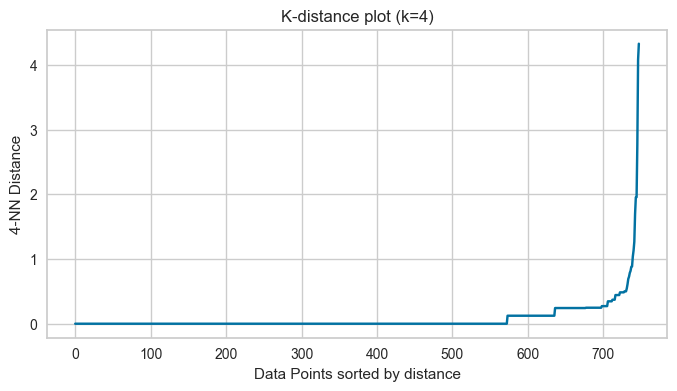

In [29]:
# X adalah datamu (harus bentuk numerik dan sudah discale kalau perlu)
k_distances = plot_k_distance(X, k=4)

In [ ]:
# Inisialisasi dan melatih model dbscan dgn eps (sudah ditentukan sebelumnya)
# dapat jumlah eps dari hasil elbow method yang ada di paling atas
dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan.fit(X)

DBSCAN(min_samples=4)

In [31]:
# kmeans = KMeans(n_clusters=3, random_state=42)
print(f"Silhouette Score: {silhouette_score(X, dbscan.fit_predict(X)):1f}")

Silhouette Score: 0.463930


## **b. Feature Selection (Opsional)**
### untuk membandingkan hasil yg pake lib kneed dengan hasil yg pake kode python

##### 1. Kneed untuk menentukan eps

In [25]:
def find_eps_with_kneed(X, k=4, plot=True):
    # Langkah 1: Hitung k-distance
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    k_distances = np.sort(distances[:, k-1])

    # Langkah 2: Gunakan KneeLocator
    kneedle = KneeLocator(range(len(k_distances)), k_distances, curve='convex', direction='increasing')
    eps = k_distances[kneedle.knee]

    # Opsional: visualisasi
    if plot:
        plt.figure(figsize=(8, 4))
        plt.plot(k_distances, label='k-distance')
        plt.axvline(kneedle.knee, color='r', linestyle='--', label='elbow')
        plt.xlabel("Points sorted by distance")
        plt.ylabel(f"{k}-NN Distance")
        plt.title(f"KneeLocator detected eps = {eps:.3f}")
        plt.legend()
        plt.grid(True)
        plt.show()

    return eps

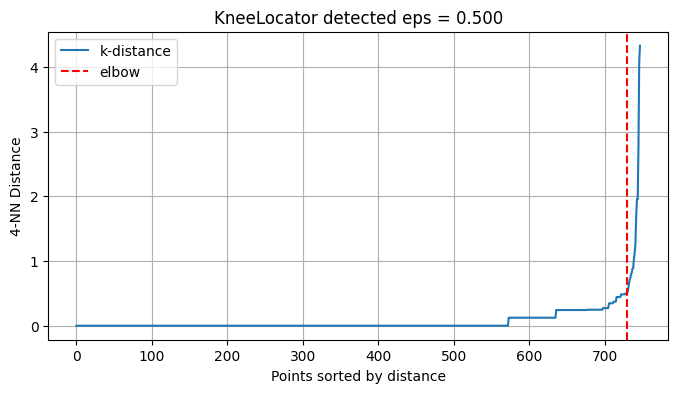

0.5002146409229503

In [26]:
eps = find_eps_with_kneed(X, k=4)  # atau k=5 sesuai kebutuhan
eps

In [28]:
dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan.fit(X)

DBSCAN(min_samples=4)

In [29]:
print(f"Silhouette Score: {silhouette_score(X, dbscan.fit_predict(X)):1f}")

Silhouette Score: 0.463930


['y', 'b', 'g', 'r']


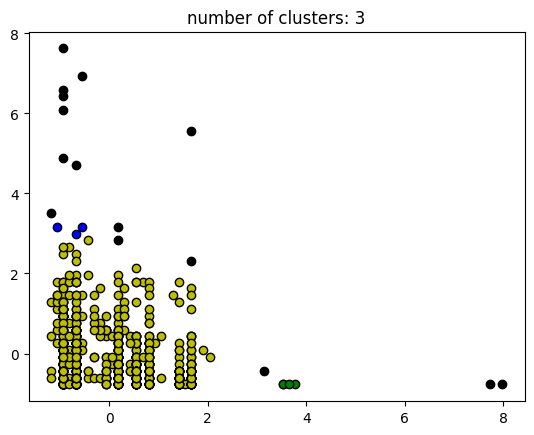

In [30]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

## **c. Visualisasi Hasil Clustering**

['y', 'b', 'g', 'r']


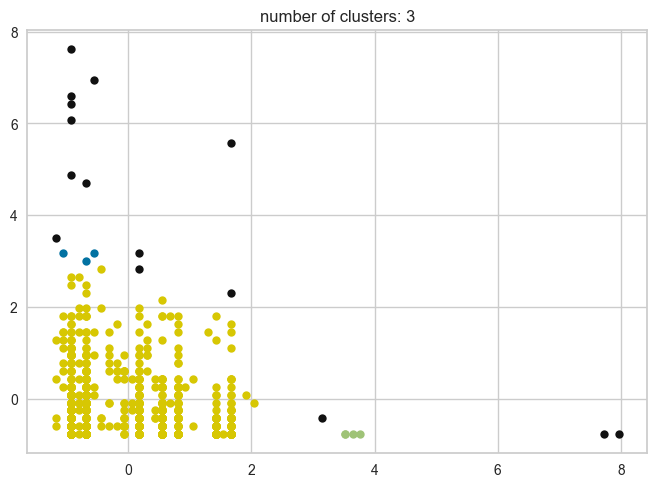

In [32]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

## **d. Return Values & Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [33]:
data_without_numMonths['Cluster'] = dbscan.labels_
data_without_numMonths['Cluster']

0     -1
1      0
2      0
3      0
4      1
      ..
743    0
744    0
745    0
746    2
747   -1
Name: Cluster, Length: 748, dtype: int64

In [34]:
data_without_numMonths

,Months,Frequencies,Monetary,NumMonth,isDonate,Cluster
0,-0.927899,7.623346,7.623346,98,1,-1
1,-1.175118,1.282738,1.282738,28,1,0
2,-1.051508,1.796842,1.796842,35,1,0
3,-0.927899,2.482313,2.482313,45,1,0
4,-1.051508,3.167784,3.167784,77,0,1
...,...,...,...,...,...,...
743,1.667904,-0.602307,-0.602307,38,0,0
744,1.420685,-0.602307,-0.602307,52,0,0
745,1.667904,-0.430940,-0.430940,62,0,0
746,3.645659,-0.773675,-0.773675,39,0,2


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [35]:
data_without_numMonths[features]

,Months,Frequencies,Monetary
0,-0.927899,7.623346,7.623346
1,-1.175118,1.282738,1.282738
2,-1.051508,1.796842,1.796842
3,-0.927899,2.482313,2.482313
4,-1.051508,3.167784,3.167784
...,...,...,...
743,1.667904,-0.602307,-0.602307
744,1.420685,-0.602307,-0.602307
745,1.667904,-0.430940,-0.430940
746,3.645659,-0.773675,-0.773675


In [36]:
scaler

StandardScaler()

In [37]:
lmao = data_without_numMonths.copy()

In [38]:
data_without_numMonths[features]=scaler.inverse_transform(data_without_numMonths[features])
data_without_numMonths

,Months,Frequencies,Monetary,NumMonth,isDonate,Cluster
0,2.0,50.0,12500.0,98,1,-1
1,0.0,13.0,3250.0,28,1,0
2,1.0,16.0,4000.0,35,1,0
3,2.0,20.0,5000.0,45,1,0
4,1.0,24.0,6000.0,77,0,1
...,...,...,...,...,...,...
743,23.0,2.0,500.0,38,0,0
744,21.0,2.0,500.0,52,0,0
745,23.0,3.0,750.0,62,0,0
746,39.0,1.0,250.0,39,0,2


In [39]:
# Sebelum mengubah nomor indeks
print(data_without_numMonths.groupby(by=['Cluster']).agg({'Months':'mean', 'Frequencies':'mean', 'Monetary':'mean'}), "\n")


            Months  Frequencies     Monetary
Cluster                                     
-1       17.866667    28.333333  7083.333333
 0        9.198347     4.993113  1248.278237
 1        3.333333    23.666667  5916.666667
 2       38.750000     1.000000   250.000000 



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
data_without_numMonths.to_csv("../data/data-with-outlier/data_dbscan.csv", index=False)